In [1]:
from tyxe_runfiles import train, eval, generate
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

/Home/siv31/tak011/.conda/envs/master/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_DIR = "./tests/pipeline-test"
PROFILE = "sin-10x-small"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

config["DEVICE"] = "cuda:6"

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile sin-10x-10k ======


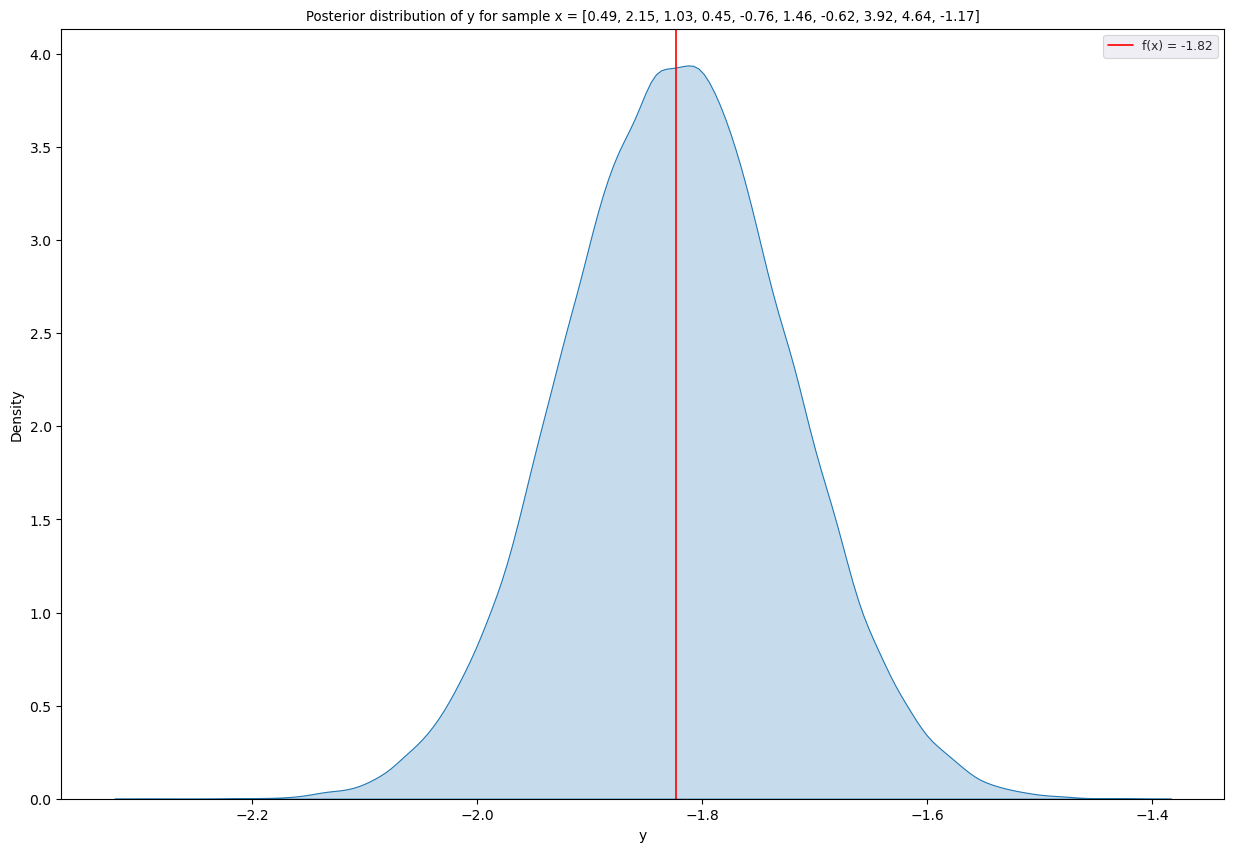

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    bnn, train_stats = train.train(config, dataset_config, f"{BASE_DIR}")

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
torch.Size([512, 10]) torch.Size([512, 1])
Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): ReLU()
  (2): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=128, out_features=1, bias=True)
)
train size: 10000
Using device: cuda:6
===== Training profile sin-10x =====
[0:00:01.156258] epoch: 0 | elbo: 124610595.2 | val_rmse: 20.50533676147461 | val_ll: -143.4691925048828
[0:00:36.429490] epoch: 100 | elbo: 9066458.65 | val_rmse: 8.44249153137207 | val_ll: -11.008803367614746
[0:01:09.379508] epoch: 200 | elbo: 3800756.775 | val_rmse: 6.2671685218811035 | val_ll: -8.80443000793457
[0:01:42.517556] epoch: 300 | elbo: 2473785.94375 | val_rmse: 5.700874328613281 | val_ll: -10.86942195892334
[0:02:15.455073] epoch: 400 | elbo: 1860388.3875 | val_rmse: 5.424710750579834 | val_ll: -13.234858512878418
[0:02:48.029327] epoch: 500 | 

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
using device: cuda:6
====== evaluating profile sin-10x ======
data samples:  (1000, 100)


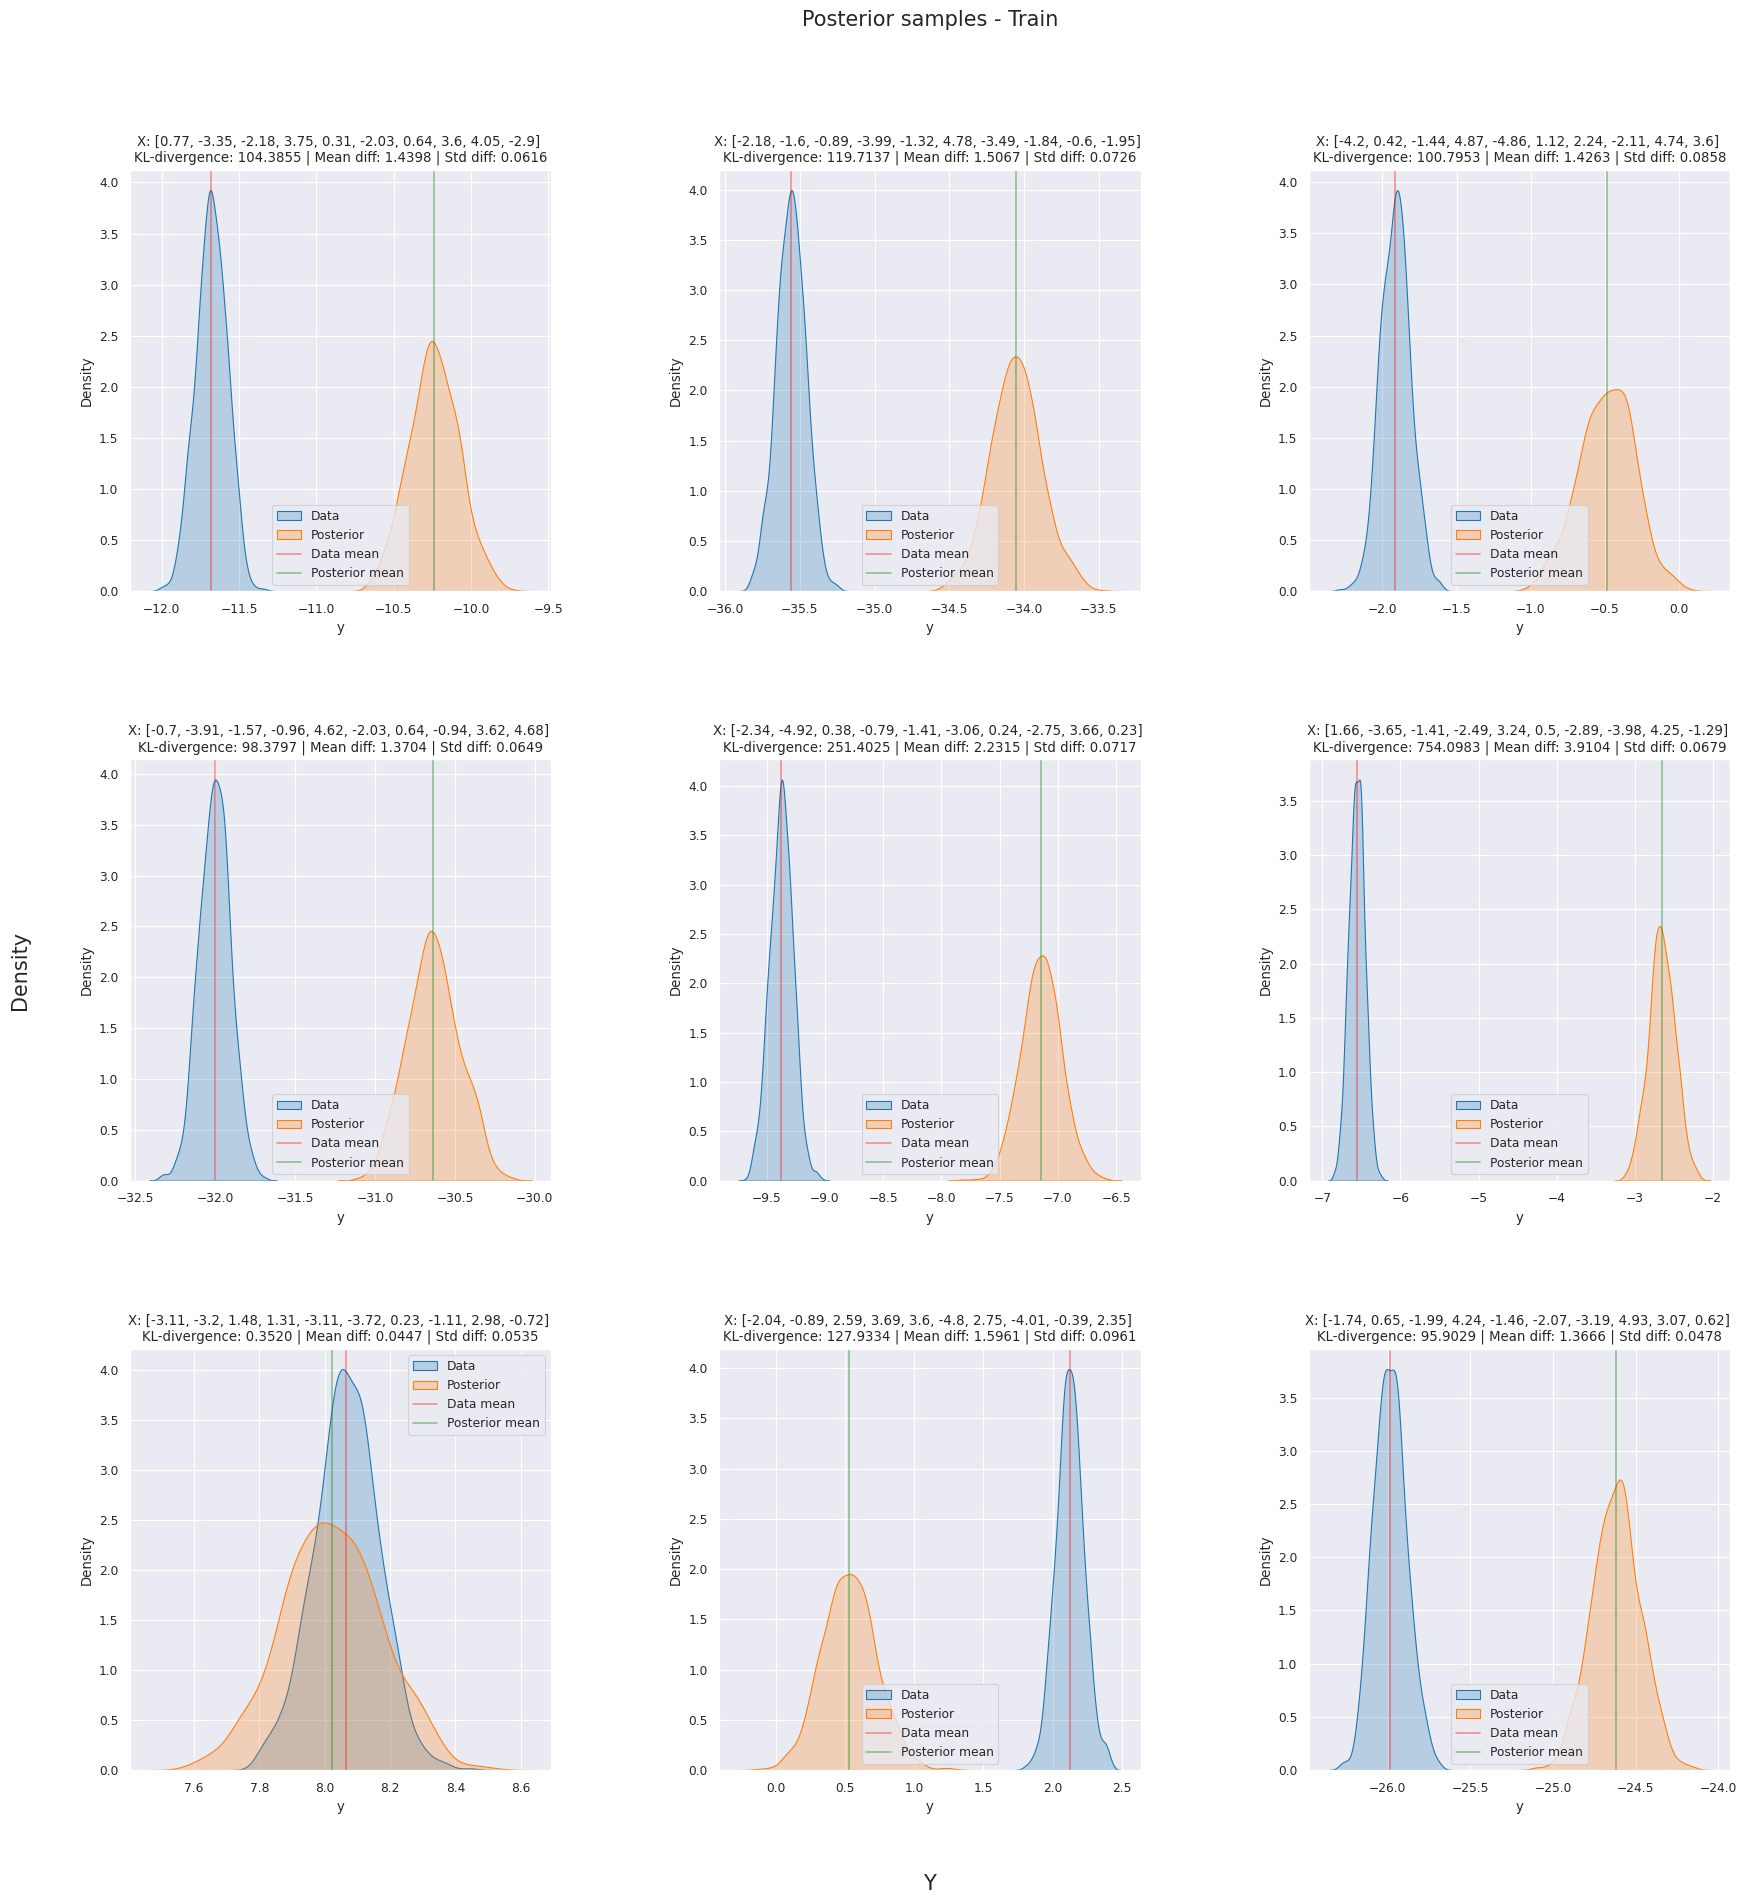

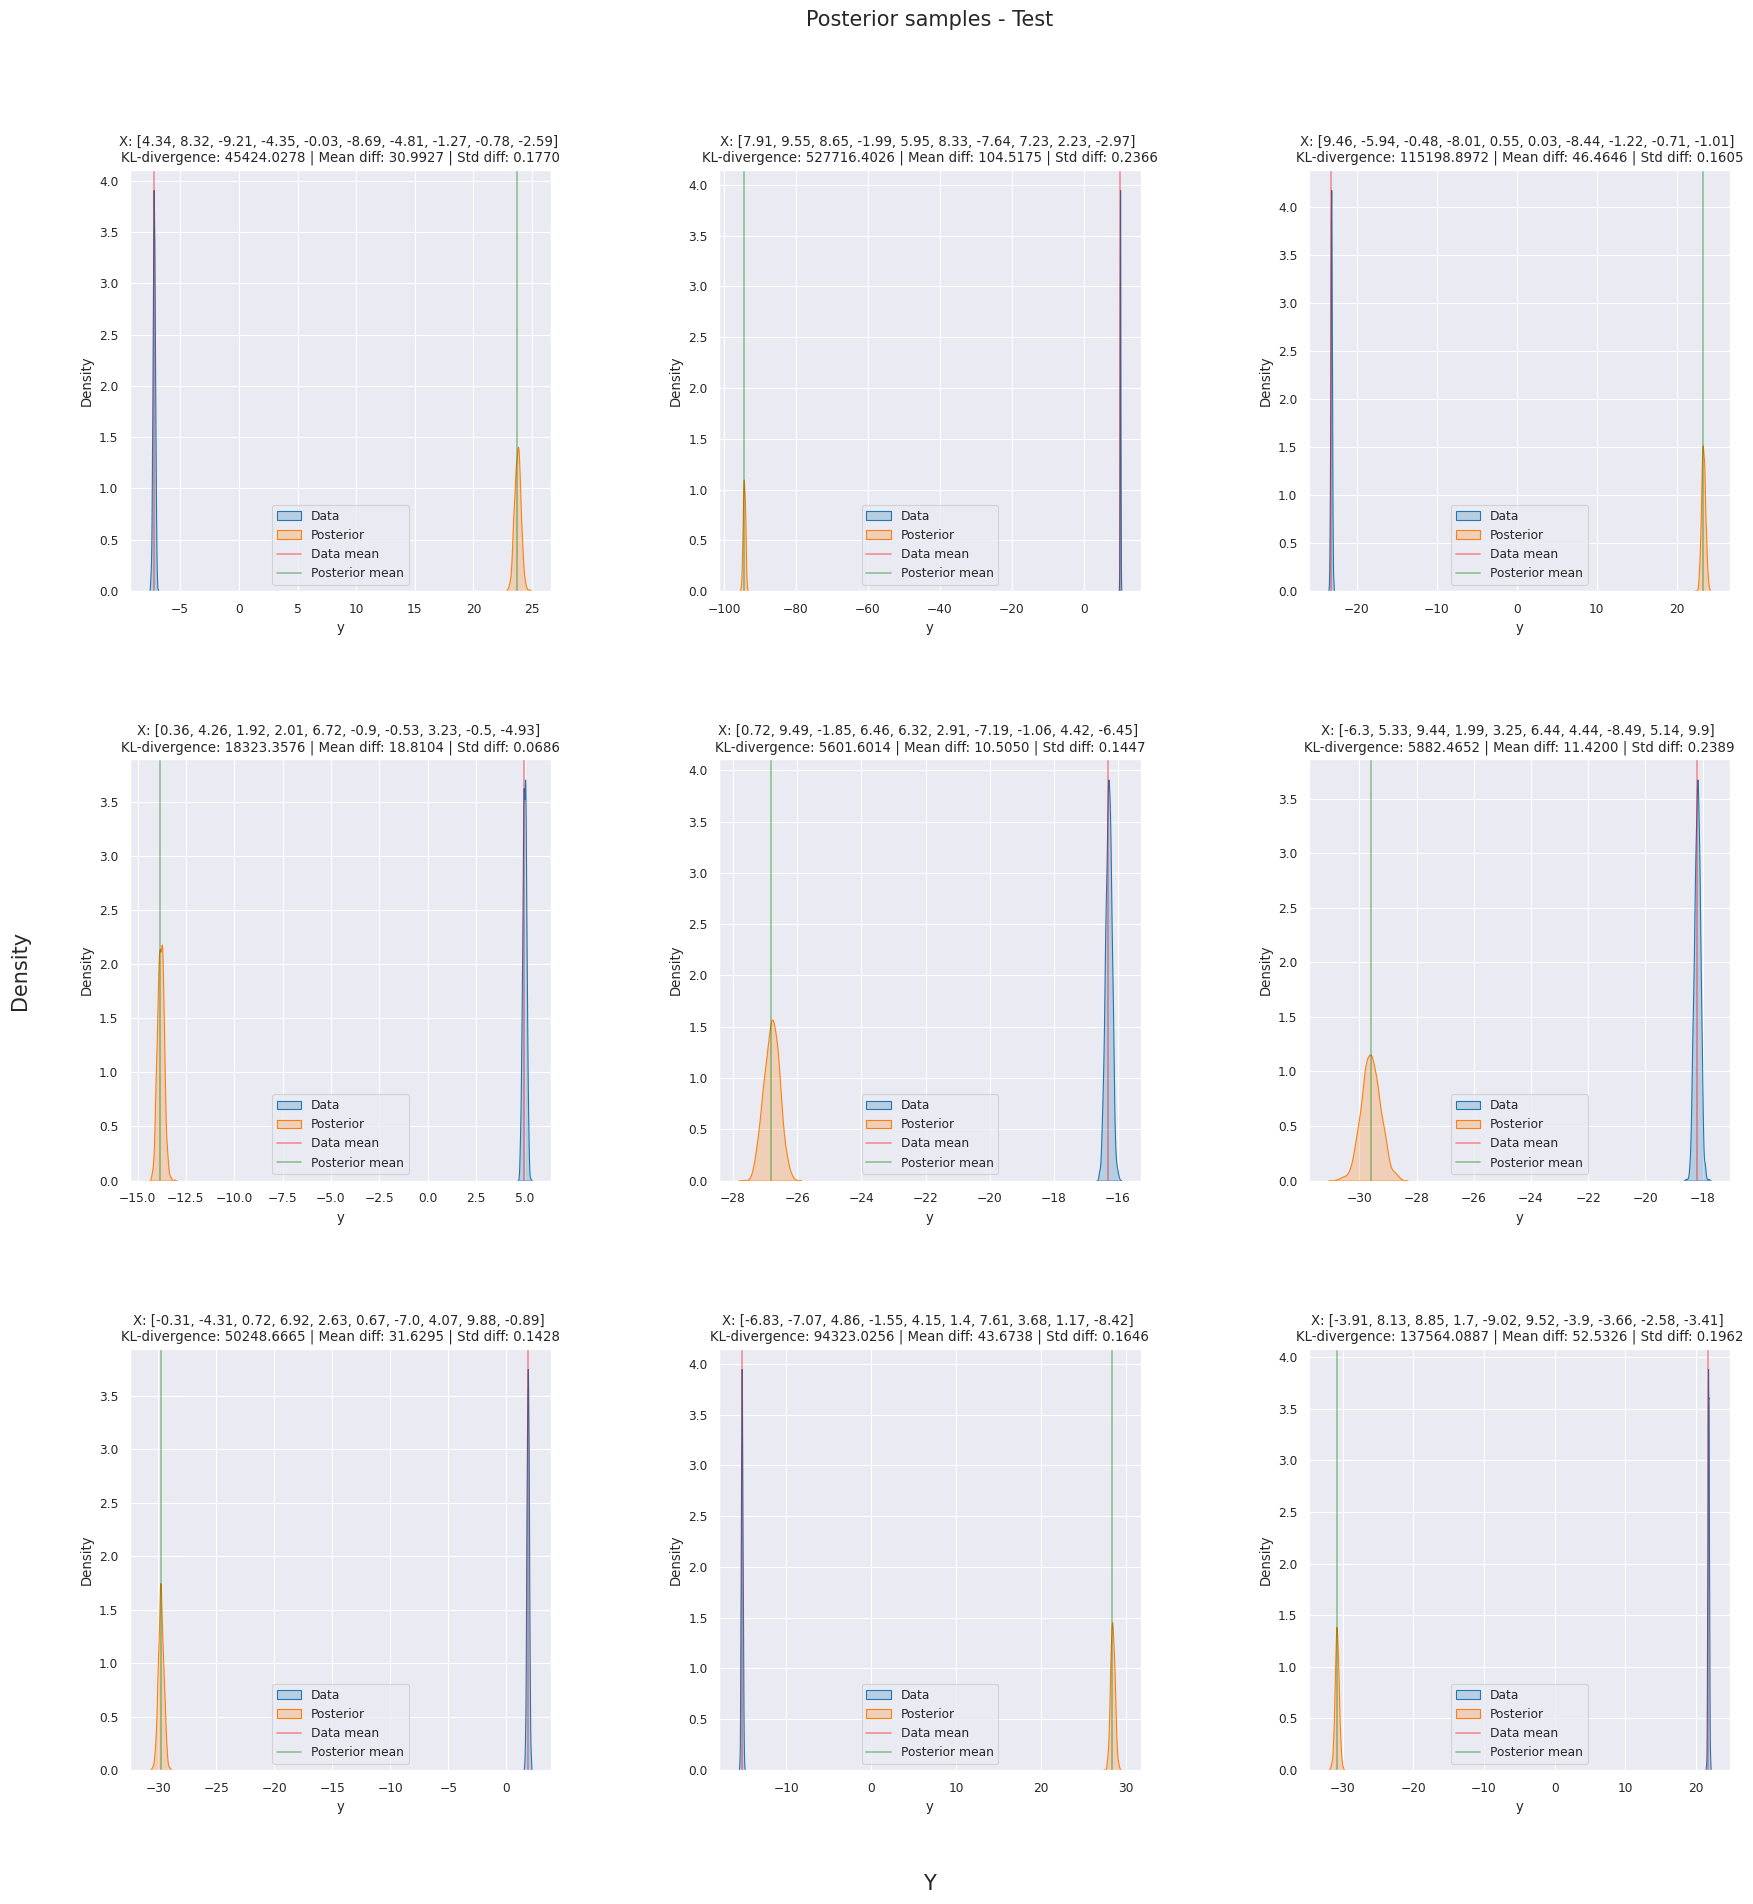

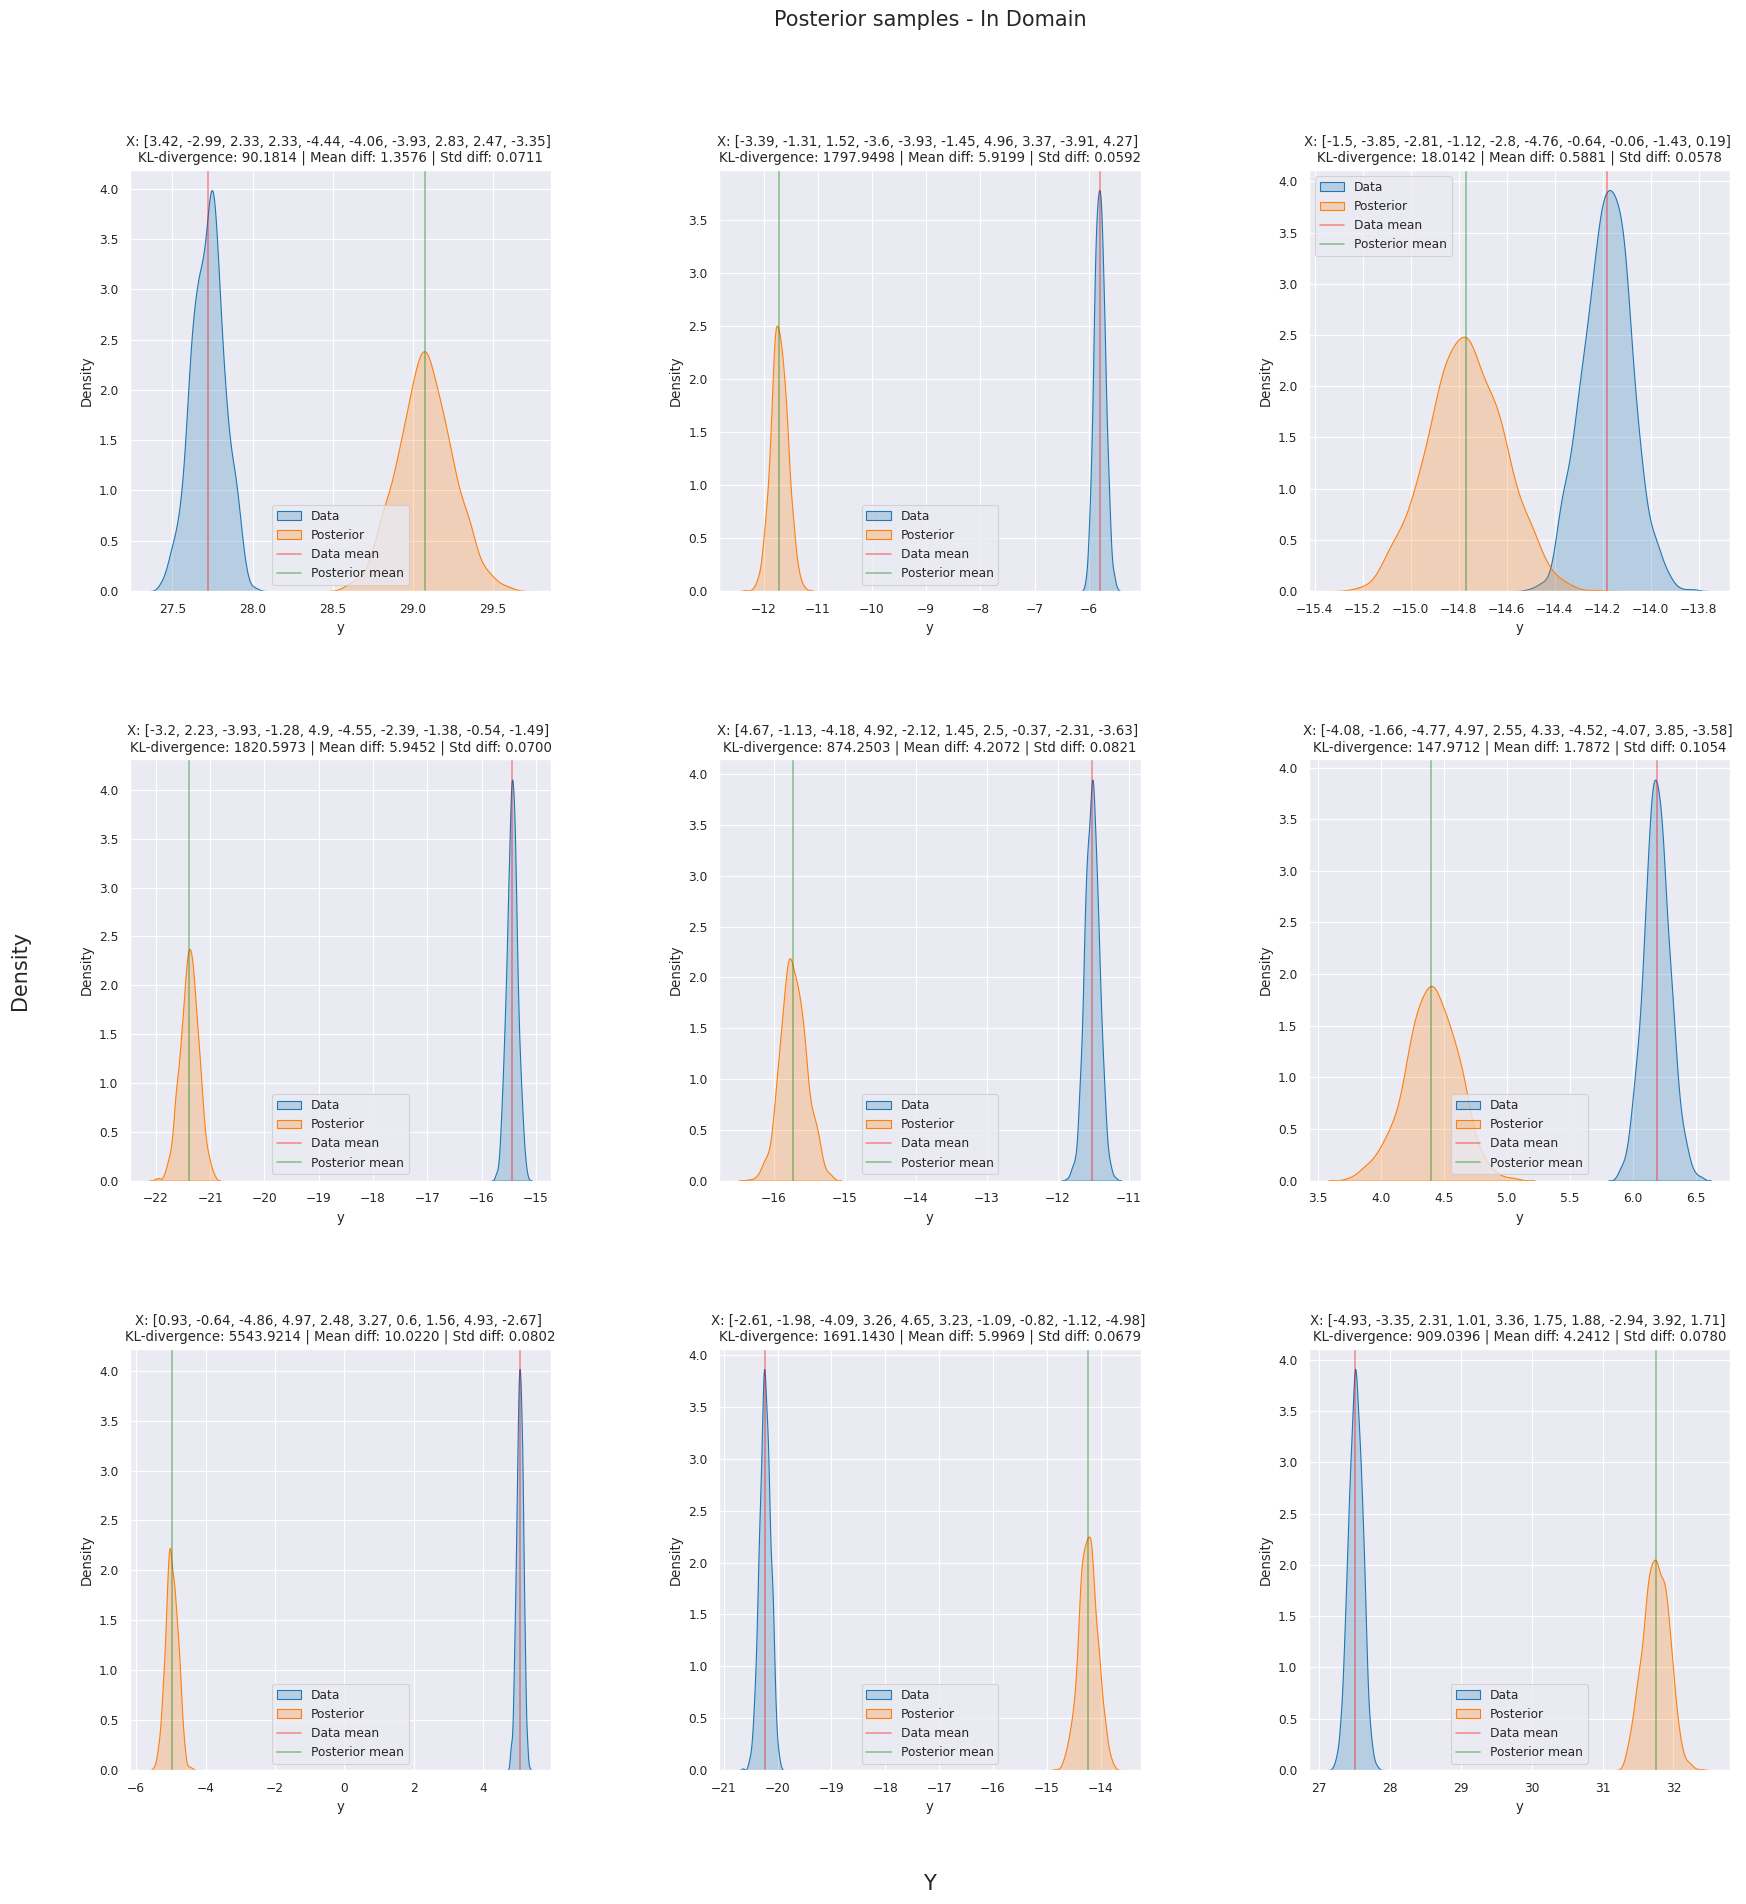

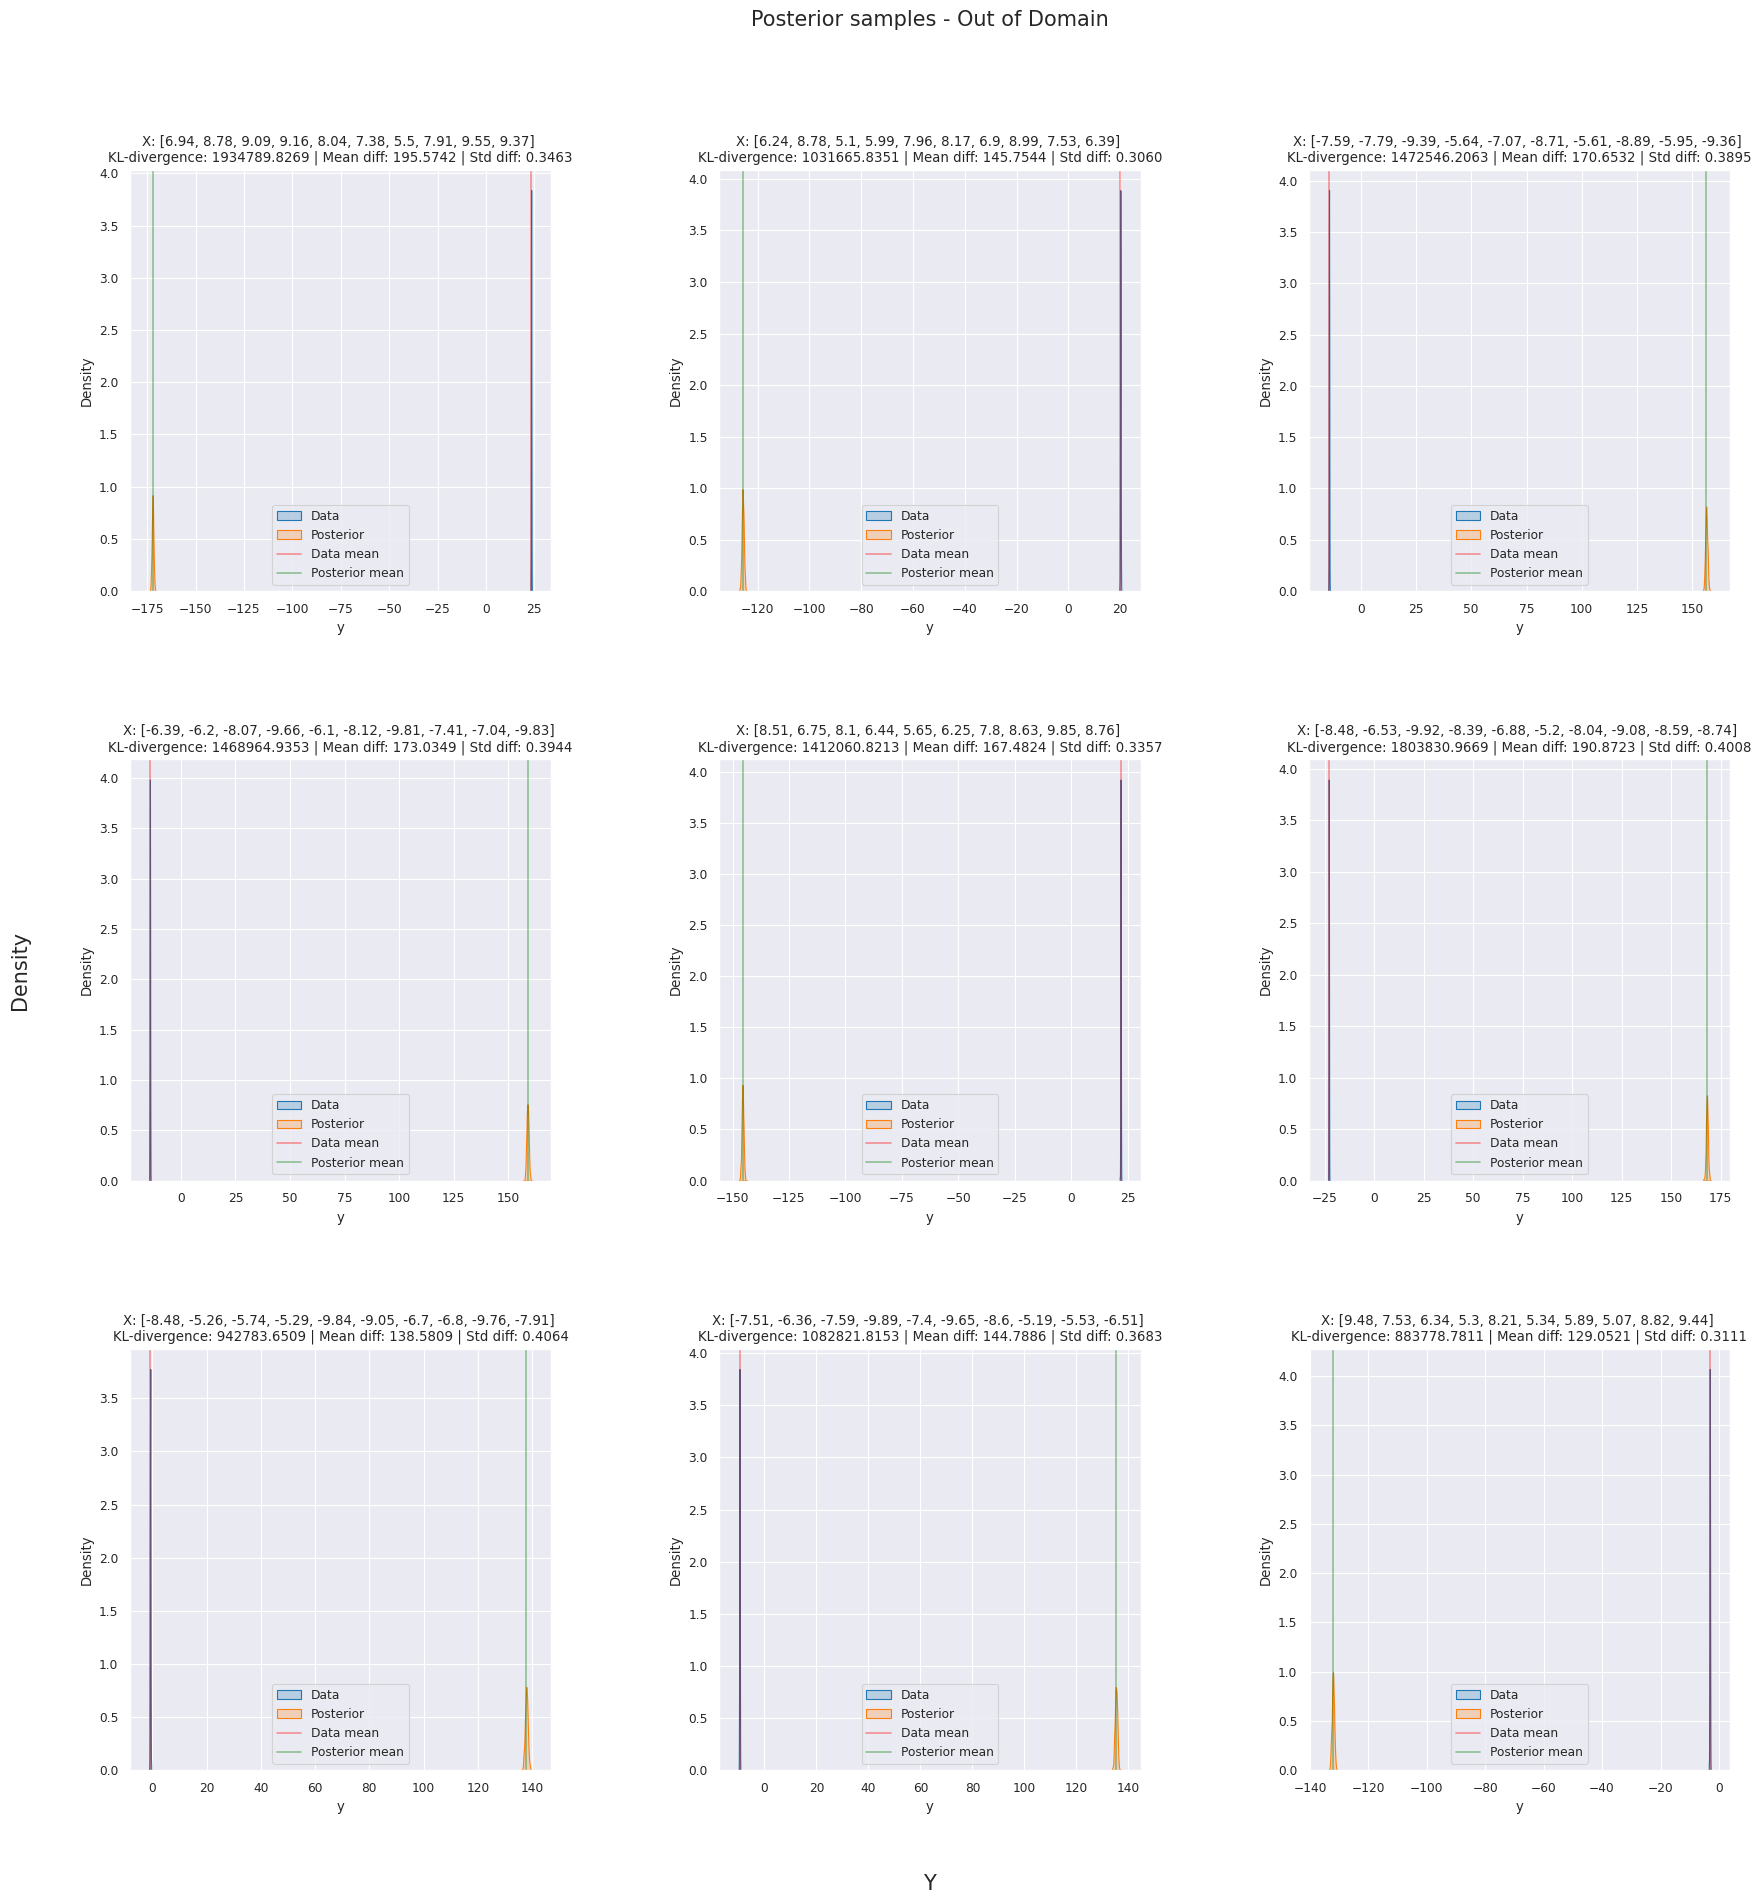

Eval done in 0:00:23.737471


In [8]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}", bnn=bnn)